# EE4375-2022: Sixth Lab Session: Galerkin Finite Element Method for the Poisson Equation on the Unit Square 

 Solves the Poisson equation $- \bigtriangleup u = f$ on the unit square domain $\Omega=(0.,1.0)^2$ supplied with the homogeneous Dirichlet boundary condition $u = 0$ on $\Gamma$. The computational domain is kept simple on purpose for illustration purposes. The source function $f$ is defined as the sourcefct in what follows. Linear finite elements on triangular elements are used. The mesh is generated using the mesh generation software called gmsh (see [Gmsh](https://gmsh.info)). More information on the use of GMSH is provided at [extended-lab-sessions/gmsh](https://github.com/ziolai/finite_element_electrical_engineering/tree/main/extended-lab-sessions/gmsh).

## Import Packages

In [1]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using SparseArrays 
using Plots
using LaTeXStrings

## Section 1: Geometry and Mesh Generation of Unit Square Geometry 
The code that follows performs <b>geometry generation</b> and <b>mesh generation</b> on the unit square geometry. 

First the <b>geometry</b> is generated in the following five steps:
1. four corner points of the square are defined. The points are labeled as 1 through 4;
2. four lines are defined as the edges of the square are defined by connecting previously defined points. Edges are formed by connecting points pairwise. The lines are given a start and end point. The lines are thus oriented. The edges are labeled as 1 through 4;  
3. the boundary of the square is defined by a loop connecting the four edges. The orientation of the edges given an orientation to the loop. The loop is oriented such that an imaginary observer walking on the loop finds the domain on his left-hand side. The loop is labeled as 1;  
4. the surface of the square is defined by the loop. It is on this square that the mesh generation will take place. This square is labeled as 1; 
5. a name is given to the surface; 

Next the <b>mesh</b> on the geometry is defined by mesh generation. The mesh is generated by first meshing the four edges of the square. The mesh is subsequently propagated towards the interior of the square. The mesh density is controlled by the parameter lc. 

The mesh is optionally written to file and visualized using the GUI. 

<b>Exercises </b>: 
1. change coordinate of one of the points and regenerate the mesh;
2. change the mesh density by changing the value of the parameter lc and regenerate the mesh. Apply different mesh density on one or more point or edges of the square; 
3. extend the code to the generation of a mesh on a pentagon; 
4. extend the code to the generation of a mesh on an L-shaped domain; 
5. extend the code to the generation of a mesh on a square with an inner square removed this practising the orientation of the loops; 
6. share imagines of the meshes obtained of social media of choice and notify your favorite finite element instructor; 

In [2]:
#..1/4: initialize gmsh 
gmsh.initialize()

#..2/4: generate geometry 
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("square")
#..set mesh density parameter 
lc = .2e-1
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([1], 1)
#..give label to the surface 
#..syntax of the function being used is gmsh.model.setPhysicalName(dim, tag, name) 
gmsh.model.setPhysicalName(2, 1, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()

#..3/4: generate two-dimensional mesh 
gmsh.model.mesh.generate(2)
#..if true, write mesh to file for further processing 
if (true) gmsh.write("square.msh") end 
#..if true, visualize mesh through the GUI 
if (false) gmsh.fltk.run() end 

#..4/4: finalize gmsh 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00079s, CPU 0.0002s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0522447s, CPU 0.049488s)
Info    : 3014 nodes 6030 elements
Info    : Writing 'square.msh'...
Info    : Done writing 'square.msh'


## Section 2:/ Read Mesh from file and perform loop over the elements 
Exercise: 
- verify that sum of area of elements over mesh equals area of entire 2D domain;

In [3]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("square.msh")

#..3/4: perform loop over the elemements 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])
  
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println(" ")

end 

#..4/4: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'
on element 1 node-1 has global number 2886
on element 1 node-2 has global number 1735
on element 1 node-3 has global number 2998
 
on element 2 node-1 has global number 1560
on element 2 node-2 has global number 1921
on element 2 node-3 has global number 1946
 
on element 3 node-1 has global number 1857
on element 3 node-2 has global number 235
on element 3 node-3 has global number 2024
 
on element 4 node-1 has global number 226
on element 4 node-2 has global number 2886
on element 4 node-3 has global number 2998
 
on element 5 node-1 has global number 2884
on element 5 node-2 has global number 2257
on element 5 node-3 has global number 2999
 
on element 6 node-1 has global number 2053
on element 6 node-2 has global number 1343
on element 6 node-3 has global number 2512
 
on element 7 node-1 has global number 2024
on element 7 node-2 has global number

on element 77 node-1 has global number 166
on element 77 node-2 has global number 167
on element 77 node-3 has global number 1764
 
on element 78 node-1 has global number 192
on element 78 node-2 has global number 193
on element 78 node-3 has global number 1765
 
on element 79 node-1 has global number 73
on element 79 node-2 has global number 74
on element 79 node-3 has global number 2143
 
on element 80 node-1 has global number 250
on element 80 node-2 has global number 1988
on element 80 node-3 has global number 1989
 
on element 81 node-1 has global number 1962
on element 81 node-2 has global number 251
on element 81 node-3 has global number 1964
 
on element 82 node-1 has global number 80
on element 82 node-2 has global number 81
on element 82 node-3 has global number 1767
 
on element 83 node-1 has global number 2894
on element 83 node-2 has global number 1318
on element 83 node-3 has global number 2903
 
on element 84 node-1 has global number 227
on element 84 node-2 has global n

on element 152 node-3 has global number 2964
 
on element 153 node-1 has global number 2858
on element 153 node-2 has global number 2107
on element 153 node-3 has global number 2980
 
on element 154 node-1 has global number 1995
on element 154 node-2 has global number 1193
on element 154 node-3 has global number 2885
 
on element 155 node-1 has global number 1994
on element 155 node-2 has global number 1993
on element 155 node-3 has global number 2881
 
on element 156 node-1 has global number 1990
on element 156 node-2 has global number 1989
on element 156 node-3 has global number 1991
 
on element 157 node-1 has global number 1762
on element 157 node-2 has global number 1763
on element 157 node-3 has global number 1768
 
on element 158 node-1 has global number 266
on element 158 node-2 has global number 1760
on element 158 node-3 has global number 2991
 
on element 159 node-1 has global number 2897
on element 159 node-2 has global number 1731
on element 159 node-3 has global number 28

on element 227 node-3 has global number 2732
 
on element 228 node-1 has global number 1614
on element 228 node-2 has global number 2034
on element 228 node-3 has global number 2801
 
on element 229 node-1 has global number 225
on element 229 node-2 has global number 1770
on element 229 node-3 has global number 2845
 
on element 230 node-1 has global number 686
on element 230 node-2 has global number 684
on element 230 node-3 has global number 2849
 
on element 231 node-1 has global number 727
on element 231 node-2 has global number 725
on element 231 node-3 has global number 2199
 
on element 232 node-1 has global number 688
on element 232 node-2 has global number 690
on element 232 node-3 has global number 1832
 
on element 233 node-1 has global number 2845
on element 233 node-2 has global number 1770
on element 233 node-3 has global number 2848
 
on element 234 node-1 has global number 225
on element 234 node-2 has global number 2820
on element 234 node-3 has global number 2834
 
on

on element 303 node-1 has global number 233
on element 303 node-2 has global number 1798
on element 303 node-3 has global number 2721
 
on element 304 node-1 has global number 691
on element 304 node-2 has global number 1780
on element 304 node-3 has global number 1882
 
on element 305 node-1 has global number 691
on element 305 node-2 has global number 688
on element 305 node-3 has global number 1832
 
on element 306 node-1 has global number 1780
on element 306 node-2 has global number 691
on element 306 node-3 has global number 1832
 
on element 307 node-1 has global number 1388
on element 307 node-2 has global number 1387
on element 307 node-3 has global number 1845
 
on element 308 node-1 has global number 1256
on element 308 node-2 has global number 2116
on element 308 node-3 has global number 2117
 
on element 309 node-1 has global number 707
on element 309 node-2 has global number 704
on element 309 node-3 has global number 1858
 
on element 310 node-1 has global number 703
on e

on element 417 node-1 has global number 453
on element 417 node-2 has global number 1956
on element 417 node-3 has global number 2601
 
on element 418 node-1 has global number 2660
on element 418 node-2 has global number 1171
on element 418 node-3 has global number 2766
 
on element 419 node-1 has global number 1506
on element 419 node-2 has global number 1295
on element 419 node-3 has global number 1817
 
on element 420 node-1 has global number 1327
on element 420 node-2 has global number 1129
on element 420 node-3 has global number 2002
 
on element 421 node-1 has global number 1239
on element 421 node-2 has global number 2287
on element 421 node-3 has global number 2809
 
on element 422 node-1 has global number 1984
on element 422 node-2 has global number 1661
on element 422 node-3 has global number 2776
 
on element 423 node-1 has global number 1047
on element 423 node-2 has global number 1093
on element 423 node-3 has global number 2002
 
on element 424 node-1 has global number 18

on element 492 node-1 has global number 914
on element 492 node-2 has global number 975
on element 492 node-3 has global number 2379
 
on element 493 node-1 has global number 1811
on element 493 node-2 has global number 1953
on element 493 node-3 has global number 2492
 
on element 494 node-1 has global number 1380
on element 494 node-2 has global number 1576
on element 494 node-3 has global number 1854
 
on element 495 node-1 has global number 1958
on element 495 node-2 has global number 1360
on element 495 node-3 has global number 2088
 
on element 496 node-1 has global number 2760
on element 496 node-2 has global number 2119
on element 496 node-3 has global number 2806
 
on element 497 node-1 has global number 1776
on element 497 node-2 has global number 2716
on element 497 node-3 has global number 2856
 
on element 498 node-1 has global number 2378
on element 498 node-2 has global number 1241
on element 498 node-3 has global number 2380
 
on element 499 node-1 has global number 651

on element 567 node-2 has global number 1063
on element 567 node-3 has global number 2199
 
on element 568 node-1 has global number 1797
on element 568 node-2 has global number 1843
on element 568 node-3 has global number 2447
 
on element 569 node-1 has global number 2112
on element 569 node-2 has global number 2149
on element 569 node-3 has global number 2531
 
on element 570 node-1 has global number 1295
on element 570 node-2 has global number 1152
on element 570 node-3 has global number 2169
 
on element 571 node-1 has global number 1489
on element 571 node-2 has global number 2855
on element 571 node-3 has global number 2865
 
on element 572 node-1 has global number 2800
on element 572 node-2 has global number 509
on element 572 node-3 has global number 2830
 
on element 573 node-1 has global number 1105
on element 573 node-2 has global number 1879
on element 573 node-3 has global number 2148
 
on element 574 node-1 has global number 730
on element 574 node-2 has global number 106

on element 642 node-2 has global number 557
on element 642 node-3 has global number 2183
 
on element 643 node-1 has global number 1327
on element 643 node-2 has global number 2003
on element 643 node-3 has global number 2728
 
on element 644 node-1 has global number 1525
on element 644 node-2 has global number 2239
on element 644 node-3 has global number 2799
 
on element 645 node-1 has global number 1812
on element 645 node-2 has global number 1897
on element 645 node-3 has global number 2353
 
on element 646 node-1 has global number 1897
on element 646 node-2 has global number 1814
on element 646 node-3 has global number 2353
 
on element 647 node-1 has global number 1980
on element 647 node-2 has global number 690
on element 647 node-3 has global number 2852
 
on element 648 node-1 has global number 2071
on element 648 node-2 has global number 1775
on element 648 node-3 has global number 2856
 
on element 649 node-1 has global number 2238
on element 649 node-2 has global number 223

on element 755 node-3 has global number 2458
 
on element 756 node-1 has global number 1930
on element 756 node-2 has global number 964
on element 756 node-3 has global number 2616
 
on element 757 node-1 has global number 1374
on element 757 node-2 has global number 1914
on element 757 node-3 has global number 2657
 
on element 758 node-1 has global number 2727
on element 758 node-2 has global number 2368
on element 758 node-3 has global number 2794
 
on element 759 node-1 has global number 1772
on element 759 node-2 has global number 2186
on element 759 node-3 has global number 2710
 
on element 760 node-1 has global number 2112
on element 760 node-2 has global number 2113
on element 760 node-3 has global number 2149
 
on element 761 node-1 has global number 1936
on element 761 node-2 has global number 1229
on element 761 node-3 has global number 2503
 
on element 762 node-1 has global number 1844
on element 762 node-2 has global number 1924
on element 762 node-3 has global number 19

on element 830 node-3 has global number 1960
 
on element 831 node-1 has global number 1293
on element 831 node-2 has global number 1691
on element 831 node-3 has global number 2724
 
on element 832 node-1 has global number 1564
on element 832 node-2 has global number 1566
on element 832 node-3 has global number 1947
 
on element 833 node-1 has global number 132
on element 833 node-2 has global number 133
on element 833 node-3 has global number 1907
 
on element 834 node-1 has global number 1145
on element 834 node-2 has global number 2559
on element 834 node-3 has global number 2574
 
on element 835 node-1 has global number 2221
on element 835 node-2 has global number 729
on element 835 node-3 has global number 2404
 
on element 836 node-1 has global number 106
on element 836 node-2 has global number 107
on element 836 node-3 has global number 1915
 
on element 837 node-1 has global number 156
on element 837 node-2 has global number 1904
on element 837 node-3 has global number 1918
 


on element 906 node-1 has global number 1339
on element 906 node-2 has global number 1633
on element 906 node-3 has global number 1945
 
on element 907 node-1 has global number 1144
on element 907 node-2 has global number 2123
on element 907 node-3 has global number 2125
 
on element 908 node-1 has global number 209
on element 908 node-2 has global number 134
on element 908 node-3 has global number 1974
 
on element 909 node-1 has global number 1936
on element 909 node-2 has global number 1639
on element 909 node-3 has global number 2029
 
on element 910 node-1 has global number 1960
on element 910 node-2 has global number 1963
on element 910 node-3 has global number 2078
 
on element 911 node-1 has global number 2278
on element 911 node-2 has global number 2064
on element 911 node-3 has global number 2520
 
on element 912 node-1 has global number 1694
on element 912 node-2 has global number 1516
on element 912 node-3 has global number 2174
 
on element 913 node-1 has global number 214

on element 981 node-1 has global number 1563
on element 981 node-2 has global number 1797
on element 981 node-3 has global number 2447
 
on element 982 node-1 has global number 1691
on element 982 node-2 has global number 2045
on element 982 node-3 has global number 2046
 
on element 983 node-1 has global number 643
on element 983 node-2 has global number 2067
on element 983 node-3 has global number 2674
 
on element 984 node-1 has global number 1559
on element 984 node-2 has global number 1561
on element 984 node-3 has global number 1563
 
on element 985 node-1 has global number 89
on element 985 node-2 has global number 218
on element 985 node-3 has global number 2108
 
on element 986 node-1 has global number 1598
on element 986 node-2 has global number 1565
on element 986 node-3 has global number 1749
 
on element 987 node-1 has global number 109
on element 987 node-2 has global number 110
on element 987 node-3 has global number 2055
 
on element 988 node-1 has global number 1566
on

on element 1055 node-1 has global number 2174
on element 1055 node-2 has global number 2173
on element 1055 node-3 has global number 2269
 
on element 1056 node-1 has global number 2375
on element 1056 node-2 has global number 565
on element 1056 node-3 has global number 2618
 
on element 1057 node-1 has global number 2075
on element 1057 node-2 has global number 559
on element 1057 node-3 has global number 2627
 
on element 1058 node-1 has global number 750
on element 1058 node-2 has global number 1172
on element 1058 node-3 has global number 2049
 
on element 1059 node-1 has global number 1072
on element 1059 node-2 has global number 2056
on element 1059 node-3 has global number 2340
 
on element 1060 node-1 has global number 2754
on element 1060 node-2 has global number 701
on element 1060 node-3 has global number 2759
 
on element 1061 node-1 has global number 530
on element 1061 node-2 has global number 533
on element 1061 node-3 has global number 2175
 
on element 1062 node-1 has

on element 1141 node-2 has global number 97
on element 1141 node-3 has global number 236
 
on element 1142 node-1 has global number 2082
on element 1142 node-2 has global number 559
on element 1142 node-3 has global number 2088
 
on element 1143 node-1 has global number 2026
on element 1143 node-2 has global number 1557
on element 1143 node-3 has global number 2447
 
on element 1144 node-1 has global number 361
on element 1144 node-2 has global number 359
on element 1144 node-3 has global number 2717
 
on element 1145 node-1 has global number 2228
on element 1145 node-2 has global number 743
on element 1145 node-3 has global number 2478
 
on element 1146 node-1 has global number 630
on element 1146 node-2 has global number 1291
on element 1146 node-3 has global number 2102
 
on element 1147 node-1 has global number 615
on element 1147 node-2 has global number 616
on element 1147 node-3 has global number 618
 
on element 1148 node-1 has global number 1902
on element 1148 node-2 has glob

on element 1215 node-1 has global number 1356
on element 1215 node-2 has global number 2121
on element 1215 node-3 has global number 2122
 
on element 1216 node-1 has global number 1379
on element 1216 node-2 has global number 1372
on element 1216 node-3 has global number 1380
 
on element 1217 node-1 has global number 388
on element 1217 node-2 has global number 1144
on element 1217 node-3 has global number 2125
 
on element 1218 node-1 has global number 624
on element 1218 node-2 has global number 635
on element 1218 node-3 has global number 636
 
on element 1219 node-1 has global number 1568
on element 1219 node-2 has global number 1313
on element 1219 node-3 has global number 2127
 
on element 1220 node-1 has global number 2433
on element 1220 node-2 has global number 2152
on element 1220 node-3 has global number 2619
 
on element 1221 node-1 has global number 142
on element 1221 node-2 has global number 143
on element 1221 node-3 has global number 225
 
on element 1222 node-1 has 

on element 1289 node-1 has global number 2110
on element 1289 node-2 has global number 2277
on element 1289 node-3 has global number 2278
 
on element 1290 node-1 has global number 1018
on element 1290 node-2 has global number 933
on element 1290 node-3 has global number 1019
 
on element 1291 node-1 has global number 1300
on element 1291 node-2 has global number 1122
on element 1291 node-3 has global number 1983
 
on element 1292 node-1 has global number 548
on element 1292 node-2 has global number 551
on element 1292 node-3 has global number 552
 
on element 1293 node-1 has global number 1793
on element 1293 node-2 has global number 1756
on element 1293 node-3 has global number 2008
 
on element 1294 node-1 has global number 1458
on element 1294 node-2 has global number 1457
on element 1294 node-3 has global number 1459
 
on element 1295 node-1 has global number 50
on element 1295 node-2 has global number 51
on element 1295 node-3 has global number 246
 
on element 1296 node-1 has gl

on element 1363 node-1 has global number 175
on element 1363 node-2 has global number 176
on element 1363 node-3 has global number 1835
 
on element 1364 node-1 has global number 1261
on element 1364 node-2 has global number 1337
on element 1364 node-3 has global number 1374
 
on element 1365 node-1 has global number 285
on element 1365 node-2 has global number 983
on element 1365 node-3 has global number 2246
 
on element 1366 node-1 has global number 485
on element 1366 node-2 has global number 2150
on element 1366 node-3 has global number 2306
 
on element 1367 node-1 has global number 1487
on element 1367 node-2 has global number 2325
on element 1367 node-3 has global number 2326
 
on element 1368 node-1 has global number 2069
on element 1368 node-2 has global number 861
on element 1368 node-3 has global number 2340
 
on element 1369 node-1 has global number 356
on element 1369 node-2 has global number 354
on element 1369 node-3 has global number 2044
 
on element 1370 node-1 has g

on element 1437 node-1 has global number 376
on element 1437 node-2 has global number 371
on element 1437 node-3 has global number 377
 
on element 1438 node-1 has global number 951
on element 1438 node-2 has global number 952
on element 1438 node-3 has global number 953
 
on element 1439 node-1 has global number 1205
on element 1439 node-2 has global number 1204
on element 1439 node-3 has global number 1582
 
on element 1440 node-1 has global number 420
on element 1440 node-2 has global number 422
on element 1440 node-3 has global number 749
 
on element 1441 node-1 has global number 737
on element 1441 node-2 has global number 739
on element 1441 node-3 has global number 2275
 
on element 1442 node-1 has global number 382
on element 1442 node-2 has global number 377
on element 1442 node-3 has global number 383
 
on element 1443 node-1 has global number 786
on element 1443 node-2 has global number 783
on element 1443 node-3 has global number 2245
 
on element 1444 node-1 has global nu

on element 1529 node-1 has global number 1544
on element 1529 node-2 has global number 1545
on element 1529 node-3 has global number 1546
 
on element 1530 node-1 has global number 1805
on element 1530 node-2 has global number 1806
on element 1530 node-3 has global number 1807
 
on element 1531 node-1 has global number 2014
on element 1531 node-2 has global number 2231
on element 1531 node-3 has global number 2232
 
on element 1532 node-1 has global number 1130
on element 1532 node-2 has global number 1202
on element 1532 node-3 has global number 1203
 
on element 1533 node-1 has global number 1576
on element 1533 node-2 has global number 1382
on element 1533 node-3 has global number 1577
 
on element 1534 node-1 has global number 1792
on element 1534 node-2 has global number 1793
on element 1534 node-3 has global number 1794
 
on element 1535 node-1 has global number 851
on element 1535 node-2 has global number 2218
on element 1535 node-3 has global number 2342
 
on element 1536 node-

on element 1603 node-1 has global number 2250
on element 1603 node-2 has global number 1920
on element 1603 node-3 has global number 2251
 
on element 1604 node-1 has global number 1127
on element 1604 node-2 has global number 1222
on element 1604 node-3 has global number 1330
 
on element 1605 node-1 has global number 535
on element 1605 node-2 has global number 536
on element 1605 node-3 has global number 986
 
on element 1606 node-1 has global number 1203
on element 1606 node-2 has global number 1204
on element 1606 node-3 has global number 1205
 
on element 1607 node-1 has global number 1014
on element 1607 node-2 has global number 1997
on element 1607 node-3 has global number 2469
 
on element 1608 node-1 has global number 1651
on element 1608 node-2 has global number 2187
on element 1608 node-3 has global number 2352
 
on element 1609 node-1 has global number 402
on element 1609 node-2 has global number 401
on element 1609 node-3 has global number 403
 
on element 1610 node-1 has

on element 1677 node-1 has global number 45
on element 1677 node-2 has global number 46
on element 1677 node-3 has global number 2130
 
on element 1678 node-1 has global number 525
on element 1678 node-2 has global number 524
on element 1678 node-3 has global number 526
 
on element 1679 node-1 has global number 399
on element 1679 node-2 has global number 401
on element 1679 node-3 has global number 402
 
on element 1680 node-1 has global number 2182
on element 1680 node-2 has global number 754
on element 1680 node-3 has global number 2184
 
on element 1681 node-1 has global number 548
on element 1681 node-2 has global number 549
on element 1681 node-3 has global number 551
 
on element 1682 node-1 has global number 1078
on element 1682 node-2 has global number 1265
on element 1682 node-3 has global number 2263
 
on element 1683 node-1 has global number 576
on element 1683 node-2 has global number 2082
on element 1683 node-3 has global number 2083
 
on element 1684 node-1 has global n

on element 1751 node-1 has global number 441
on element 1751 node-2 has global number 438
on element 1751 node-3 has global number 442
 
on element 1752 node-1 has global number 467
on element 1752 node-2 has global number 469
on element 1752 node-3 has global number 470
 
on element 1753 node-1 has global number 2209
on element 1753 node-2 has global number 2104
on element 1753 node-3 has global number 2210
 
on element 1754 node-1 has global number 1319
on element 1754 node-2 has global number 1124
on element 1754 node-3 has global number 1416
 
on element 1755 node-1 has global number 675
on element 1755 node-2 has global number 674
on element 1755 node-3 has global number 676
 
on element 1756 node-1 has global number 278
on element 1756 node-2 has global number 201
on element 1756 node-3 has global number 279
 
on element 1757 node-1 has global number 2240
on element 1757 node-2 has global number 1449
on element 1757 node-3 has global number 2241
 
on element 1758 node-1 has globa

on element 1825 node-1 has global number 403
on element 1825 node-2 has global number 405
on element 1825 node-3 has global number 2151
 
on element 1826 node-1 has global number 1320
on element 1826 node-2 has global number 1716
on element 1826 node-3 has global number 2105
 
on element 1827 node-1 has global number 2046
on element 1827 node-2 has global number 2045
on element 1827 node-3 has global number 2047
 
on element 1828 node-1 has global number 383
on element 1828 node-2 has global number 377
on element 1828 node-3 has global number 2106
 
on element 1829 node-1 has global number 956
on element 1829 node-2 has global number 955
on element 1829 node-3 has global number 957
 
on element 1830 node-1 has global number 1298
on element 1830 node-2 has global number 1080
on element 1830 node-3 has global number 1389
 
on element 1831 node-1 has global number 177
on element 1831 node-2 has global number 178
on element 1831 node-3 has global number 1855
 
on element 1832 node-1 has gl

on element 1926 node-3 has global number 2254
 
on element 1927 node-1 has global number 2021
on element 1927 node-2 has global number 2017
on element 1927 node-3 has global number 2272
 
on element 1928 node-1 has global number 1335
on element 1928 node-2 has global number 1732
on element 1928 node-3 has global number 1733
 
on element 1929 node-1 has global number 1808
on element 1929 node-2 has global number 1807
on element 1929 node-3 has global number 1810
 
on element 1930 node-1 has global number 445
on element 1930 node-2 has global number 444
on element 1930 node-3 has global number 446
 
on element 1931 node-1 has global number 535
on element 1931 node-2 has global number 986
on element 1931 node-3 has global number 2173
 
on element 1932 node-1 has global number 1225
on element 1932 node-2 has global number 1054
on element 1932 node-3 has global number 1406
 
on element 1933 node-1 has global number 847
on element 1933 node-2 has global number 842
on element 1933 node-3 has 

on element 2000 node-3 has global number 2220
 
on element 2001 node-1 has global number 1220
on element 2001 node-2 has global number 2254
on element 2001 node-3 has global number 2255
 
on element 2002 node-1 has global number 489
on element 2002 node-2 has global number 490
on element 2002 node-3 has global number 491
 
on element 2003 node-1 has global number 1030
on element 2003 node-2 has global number 1031
on element 2003 node-3 has global number 1032
 
on element 2004 node-1 has global number 664
on element 2004 node-2 has global number 666
on element 2004 node-3 has global number 669
 
on element 2005 node-1 has global number 1804
on element 2005 node-2 has global number 1623
on element 2005 node-3 has global number 1805
 
on element 2006 node-1 has global number 299
on element 2006 node-2 has global number 375
on element 2006 node-3 has global number 2326
 
on element 2007 node-1 has global number 1935
on element 2007 node-2 has global number 2375
on element 2007 node-3 has g

on element 2074 node-2 has global number 1030
on element 2074 node-3 has global number 2213
 
on element 2075 node-1 has global number 620
on element 2075 node-2 has global number 622
on element 2075 node-3 has global number 1068
 
on element 2076 node-1 has global number 1292
on element 2076 node-2 has global number 1078
on element 2076 node-3 has global number 2263
 
on element 2077 node-1 has global number 77
on element 2077 node-2 has global number 1887
on element 2077 node-3 has global number 2331
 
on element 2078 node-1 has global number 470
on element 2078 node-2 has global number 471
on element 2078 node-3 has global number 2273
 
on element 2079 node-1 has global number 1426
on element 2079 node-2 has global number 1187
on element 2079 node-3 has global number 2166
 
on element 2080 node-1 has global number 990
on element 2080 node-2 has global number 991
on element 2080 node-3 has global number 999
 
on element 2081 node-1 has global number 1800
on element 2081 node-2 has gl

on element 2148 node-1 has global number 803
on element 2148 node-2 has global number 793
on element 2148 node-3 has global number 2094
 
on element 2149 node-1 has global number 335
on element 2149 node-2 has global number 337
on element 2149 node-3 has global number 2318
 
on element 2150 node-1 has global number 942
on element 2150 node-2 has global number 943
on element 2150 node-3 has global number 987
 
on element 2151 node-1 has global number 1385
on element 2151 node-2 has global number 1267
on element 2151 node-3 has global number 1390
 
on element 2152 node-1 has global number 1415
on element 2152 node-2 has global number 1414
on element 2152 node-3 has global number 1829
 
on element 2153 node-1 has global number 374
on element 2153 node-2 has global number 1383
on element 2153 node-3 has global number 1410
 
on element 2154 node-1 has global number 2218
on element 2154 node-2 has global number 2341
on element 2154 node-3 has global number 2342
 
on element 2155 node-1 has g

on element 2222 node-1 has global number 1385
on element 2222 node-2 has global number 1391
on element 2222 node-3 has global number 1932
 
on element 2223 node-1 has global number 2239
on element 2223 node-2 has global number 505
on element 2223 node-3 has global number 2296
 
on element 2224 node-1 has global number 983
on element 2224 node-2 has global number 984
on element 2224 node-3 has global number 988
 
on element 2225 node-1 has global number 813
on element 2225 node-2 has global number 2151
on element 2225 node-3 has global number 2433
 
on element 2226 node-1 has global number 562
on element 2226 node-2 has global number 563
on element 2226 node-3 has global number 564
 
on element 2227 node-1 has global number 829
on element 2227 node-2 has global number 828
on element 2227 node-3 has global number 830
 
on element 2228 node-1 has global number 1415
on element 2228 node-2 has global number 1829
on element 2228 node-3 has global number 2100
 
on element 2229 node-1 has glob

on element 2320 node-1 has global number 2193
on element 2320 node-2 has global number 2192
on element 2320 node-3 has global number 2194
 
on element 2321 node-1 has global number 1649
on element 2321 node-2 has global number 2262
on element 2321 node-3 has global number 2288
 
on element 2322 node-1 has global number 443
on element 2322 node-2 has global number 445
on element 2322 node-3 has global number 591
 
on element 2323 node-1 has global number 522
on element 2323 node-2 has global number 525
on element 2323 node-3 has global number 2338
 
on element 2324 node-1 has global number 322
on element 2324 node-2 has global number 321
on element 2324 node-3 has global number 323
 
on element 2325 node-1 has global number 1410
on element 2325 node-2 has global number 1383
on element 2325 node-3 has global number 1790
 
on element 2326 node-1 has global number 852
on element 2326 node-2 has global number 853
on element 2326 node-3 has global number 854
 
on element 2327 node-1 has glob

on element 2394 node-1 has global number 2620
on element 2394 node-2 has global number 2075
on element 2394 node-3 has global number 2627
 
on element 2395 node-1 has global number 449
on element 2395 node-2 has global number 448
on element 2395 node-3 has global number 450
 
on element 2396 node-1 has global number 1036
on element 2396 node-2 has global number 1101
on element 2396 node-3 has global number 2299
 
on element 2397 node-1 has global number 745
on element 2397 node-2 has global number 740
on element 2397 node-3 has global number 2260
 
on element 2398 node-1 has global number 1737
on element 2398 node-2 has global number 1477
on element 2398 node-3 has global number 2381
 
on element 2399 node-1 has global number 642
on element 2399 node-2 has global number 641
on element 2399 node-3 has global number 667
 
on element 2400 node-1 has global number 1645
on element 2400 node-2 has global number 2056
on element 2400 node-3 has global number 2057
 
on element 2401 node-1 has g

on element 2468 node-1 has global number 859
on element 2468 node-2 has global number 857
on element 2468 node-3 has global number 1072
 
on element 2469 node-1 has global number 742
on element 2469 node-2 has global number 740
on element 2469 node-3 has global number 745
 
on element 2470 node-1 has global number 1639
on element 2470 node-2 has global number 1222
on element 2470 node-3 has global number 2029
 
on element 2471 node-1 has global number 339
on element 2471 node-2 has global number 582
on element 2471 node-3 has global number 2048
 
on element 2472 node-1 has global number 1389
on element 2472 node-2 has global number 1080
on element 2472 node-3 has global number 2214
 
on element 2473 node-1 has global number 278
on element 2473 node-2 has global number 279
on element 2473 node-3 has global number 280
 
on element 2474 node-1 has global number 1569
on element 2474 node-2 has global number 1570
on element 2474 node-3 has global number 1571
 
on element 2475 node-1 has glo

on element 2542 node-1 has global number 2262
on element 2542 node-2 has global number 1649
on element 2542 node-3 has global number 2308
 
on element 2543 node-1 has global number 353
on element 2543 node-2 has global number 350
on element 2543 node-3 has global number 354
 
on element 2544 node-1 has global number 1067
on element 2544 node-2 has global number 1418
on element 2544 node-3 has global number 1420
 
on element 2545 node-1 has global number 1352
on element 2545 node-2 has global number 1613
on element 2545 node-3 has global number 2489
 
on element 2546 node-1 has global number 1411
on element 2546 node-2 has global number 1413
on element 2546 node-3 has global number 2289
 
on element 2547 node-1 has global number 1486
on element 2547 node-2 has global number 2433
on element 2547 node-3 has global number 2619
 
on element 2548 node-1 has global number 1252
on element 2548 node-2 has global number 1254
on element 2548 node-3 has global number 1356
 
on element 2549 node-1 

on element 2615 node-3 has global number 1973
 
on element 2616 node-1 has global number 1125
on element 2616 node-2 has global number 900
on element 2616 node-3 has global number 2308
 
on element 2617 node-1 has global number 2016
on element 2617 node-2 has global number 2015
on element 2617 node-3 has global number 2017
 
on element 2618 node-1 has global number 721
on element 2618 node-2 has global number 720
on element 2618 node-3 has global number 722
 
on element 2619 node-1 has global number 863
on element 2619 node-2 has global number 864
on element 2619 node-3 has global number 889
 
on element 2620 node-1 has global number 954
on element 2620 node-2 has global number 952
on element 2620 node-3 has global number 960
 
on element 2621 node-1 has global number 1368
on element 2621 node-2 has global number 1140
on element 2621 node-3 has global number 1370
 
on element 2622 node-1 has global number 1649
on element 2622 node-2 has global number 1156
on element 2622 node-3 has glo

on element 2696 node-1 has global number 564
on element 2696 node-2 has global number 566
on element 2696 node-3 has global number 2298
 
on element 2697 node-1 has global number 1424
on element 2697 node-2 has global number 1042
on element 2697 node-3 has global number 2371
 
on element 2698 node-1 has global number 297
on element 2698 node-2 has global number 299
on element 2698 node-3 has global number 2326
 
on element 2699 node-1 has global number 319
on element 2699 node-2 has global number 1653
on element 2699 node-3 has global number 2376
 
on element 2700 node-1 has global number 170
on element 2700 node-2 has global number 171
on element 2700 node-3 has global number 205
 
on element 2701 node-1 has global number 2069
on element 2701 node-2 has global number 1390
on element 2701 node-3 has global number 2227
 
on element 2702 node-1 has global number 1863
on element 2702 node-2 has global number 1862
on element 2702 node-3 has global number 1864
 
on element 2703 node-1 has g

on element 2770 node-1 has global number 1157
on element 2770 node-2 has global number 1155
on element 2770 node-3 has global number 1158
 
on element 2771 node-1 has global number 10
on element 2771 node-2 has global number 11
on element 2771 node-3 has global number 231
 
on element 2772 node-1 has global number 1349
on element 2772 node-2 has global number 1350
on element 2772 node-3 has global number 1617
 
on element 2773 node-1 has global number 486
on element 2773 node-2 has global number 810
on element 2773 node-3 has global number 2301
 
on element 2774 node-1 has global number 562
on element 2774 node-2 has global number 812
on element 2774 node-3 has global number 2291
 
on element 2775 node-1 has global number 2532
on element 2775 node-2 has global number 1881
on element 2775 node-3 has global number 2615
 
on element 2776 node-1 has global number 328
on element 2776 node-2 has global number 330
on element 2776 node-3 has global number 332
 
on element 2777 node-1 has globa

on element 2844 node-1 has global number 2020
on element 2844 node-2 has global number 2019
on element 2844 node-3 has global number 2022
 
on element 2845 node-1 has global number 823
on element 2845 node-2 has global number 1145
on element 2845 node-3 has global number 2286
 
on element 2846 node-1 has global number 1005
on element 2846 node-2 has global number 1128
on element 2846 node-3 has global number 1685
 
on element 2847 node-1 has global number 1425
on element 2847 node-2 has global number 1426
on element 2847 node-3 has global number 1427
 
on element 2848 node-1 has global number 2061
on element 2848 node-2 has global number 2062
on element 2848 node-3 has global number 2063
 
on element 2849 node-1 has global number 262
on element 2849 node-2 has global number 71
on element 2849 node-3 has global number 2346
 
on element 2850 node-1 has global number 1104
on element 2850 node-2 has global number 1042
on element 2850 node-3 has global number 1424
 
on element 2851 node-1 h

on element 2917 node-3 has global number 1184
 
on element 2918 node-1 has global number 1269
on element 2918 node-2 has global number 1107
on element 2918 node-3 has global number 2314
 
on element 2919 node-1 has global number 1637
on element 2919 node-2 has global number 1636
on element 2919 node-3 has global number 1928
 
on element 2920 node-1 has global number 504
on element 2920 node-2 has global number 502
on element 2920 node-3 has global number 507
 
on element 2921 node-1 has global number 1270
on element 2921 node-2 has global number 1377
on element 2921 node-3 has global number 1657
 
on element 2922 node-1 has global number 500
on element 2922 node-2 has global number 502
on element 2922 node-3 has global number 503
 
on element 2923 node-1 has global number 1250
on element 2923 node-2 has global number 1249
on element 2923 node-3 has global number 1251
 
on element 2924 node-1 has global number 2018
on element 2924 node-2 has global number 2019
on element 2924 node-3 has

on element 2981 node-3 has global number 1621
 
on element 2982 node-1 has global number 393
on element 2982 node-2 has global number 389
on element 2982 node-3 has global number 2305
 
on element 2983 node-1 has global number 1386
on element 2983 node-2 has global number 1970
on element 2983 node-3 has global number 2302
 
on element 2984 node-1 has global number 2158
on element 2984 node-2 has global number 2157
on element 2984 node-3 has global number 2160
 
on element 2985 node-1 has global number 449
on element 2985 node-2 has global number 590
on element 2985 node-3 has global number 2361
 
on element 2986 node-1 has global number 464
on element 2986 node-2 has global number 462
on element 2986 node-3 has global number 554
 
on element 2987 node-1 has global number 1617
on element 2987 node-2 has global number 1618
on element 2987 node-3 has global number 1785
 
on element 2988 node-1 has global number 726
on element 2988 node-2 has global number 727
on element 2988 node-3 has gl

on element 3055 node-2 has global number 730
on element 3055 node-3 has global number 731
 
on element 3056 node-1 has global number 1141
on element 3056 node-2 has global number 1140
on element 3056 node-3 has global number 1368
 
on element 3057 node-1 has global number 1443
on element 3057 node-2 has global number 1369
on element 3057 node-3 has global number 1912
 
on element 3058 node-1 has global number 426
on element 3058 node-2 has global number 562
on element 3058 node-3 has global number 2291
 
on element 3059 node-1 has global number 1136
on element 3059 node-2 has global number 1069
on element 3059 node-3 has global number 1242
 
on element 3060 node-1 has global number 1163
on element 3060 node-2 has global number 1162
on element 3060 node-3 has global number 2302
 
on element 3061 node-1 has global number 299
on element 3061 node-2 has global number 298
on element 3061 node-3 has global number 300
 
on element 3062 node-1 has global number 714
on element 3062 node-2 has g

on element 3129 node-3 has global number 831
 
on element 3130 node-1 has global number 898
on element 3130 node-2 has global number 2383
on element 3130 node-3 has global number 2542
 
on element 3131 node-1 has global number 1446
on element 3131 node-2 has global number 1447
on element 3131 node-3 has global number 1837
 
on element 3132 node-1 has global number 974
on element 3132 node-2 has global number 747
on element 3132 node-3 has global number 1069
 
on element 3133 node-1 has global number 804
on element 3133 node-2 has global number 1040
on element 3133 node-3 has global number 2498
 
on element 3134 node-1 has global number 689
on element 3134 node-2 has global number 692
on element 3134 node-3 has global number 693
 
on element 3135 node-1 has global number 1161
on element 3135 node-2 has global number 1162
on element 3135 node-3 has global number 1163
 
on element 3136 node-1 has global number 1460
on element 3136 node-2 has global number 1590
on element 3136 node-3 has g

on element 3203 node-2 has global number 700
on element 3203 node-3 has global number 702
 
on element 3204 node-1 has global number 307
on element 3204 node-2 has global number 306
on element 3204 node-3 has global number 308
 
on element 3205 node-1 has global number 1264
on element 3205 node-2 has global number 1263
on element 3205 node-3 has global number 1517
 
on element 3206 node-1 has global number 1523
on element 3206 node-2 has global number 1511
on element 3206 node-3 has global number 1711
 
on element 3207 node-1 has global number 457
on element 3207 node-2 has global number 456
on element 3207 node-3 has global number 458
 
on element 3208 node-1 has global number 1657
on element 3208 node-2 has global number 1377
on element 3208 node-3 has global number 1658
 
on element 3209 node-1 has global number 1504
on element 3209 node-2 has global number 1505
on element 3209 node-3 has global number 1698
 
on element 3210 node-1 has global number 1050
on element 3210 node-2 has g

on element 3277 node-2 has global number 332
on element 3277 node-3 has global number 2351
 
on element 3278 node-1 has global number 417
on element 3278 node-2 has global number 419
on element 3278 node-3 has global number 420
 
on element 3279 node-1 has global number 538
on element 3279 node-2 has global number 537
on element 3279 node-3 has global number 539
 
on element 3280 node-1 has global number 950
on element 3280 node-2 has global number 1173
on element 3280 node-3 has global number 2347
 
on element 3281 node-1 has global number 1338
on element 3281 node-2 has global number 1340
on element 3281 node-3 has global number 2009
 
on element 3282 node-1 has global number 2013
on element 3282 node-2 has global number 2015
on element 3282 node-3 has global number 2016
 
on element 3283 node-1 has global number 717
on element 3283 node-2 has global number 718
on element 3283 node-3 has global number 2413
 
on element 3284 node-1 has global number 469
on element 3284 node-2 has glob

on element 3351 node-2 has global number 1665
on element 3351 node-3 has global number 1666
 
on element 3352 node-1 has global number 1446
on element 3352 node-2 has global number 1838
on element 3352 node-3 has global number 2389
 
on element 3353 node-1 has global number 376
on element 3353 node-2 has global number 382
on element 3353 node-3 has global number 2387
 
on element 3354 node-1 has global number 551
on element 3354 node-2 has global number 549
on element 3354 node-3 has global number 553
 
on element 3355 node-1 has global number 341
on element 3355 node-2 has global number 342
on element 3355 node-3 has global number 343
 
on element 3356 node-1 has global number 468
on element 3356 node-2 has global number 466
on element 3356 node-3 has global number 923
 
on element 3357 node-1 has global number 1074
on element 3357 node-2 has global number 967
on element 3357 node-3 has global number 1168
 
on element 3358 node-1 has global number 64
on element 3358 node-2 has global 

on element 3436 node-1 has global number 1271
on element 3436 node-2 has global number 921
on element 3436 node-3 has global number 1272
 
on element 3437 node-1 has global number 810
on element 3437 node-2 has global number 483
on element 3437 node-3 has global number 2306
 
on element 3438 node-1 has global number 532
on element 3438 node-2 has global number 531
on element 3438 node-3 has global number 966
 
on element 3439 node-1 has global number 647
on element 3439 node-2 has global number 632
on element 3439 node-3 has global number 648
 
on element 3440 node-1 has global number 963
on element 3440 node-2 has global number 962
on element 3440 node-3 has global number 968
 
on element 3441 node-1 has global number 831
on element 3441 node-2 has global number 833
on element 3441 node-3 has global number 2435
 
on element 3442 node-1 has global number 836
on element 3442 node-2 has global number 839
on element 3442 node-3 has global number 840
 
on element 3443 node-1 has global num

on element 3510 node-1 has global number 121
on element 3510 node-2 has global number 206
on element 3510 node-3 has global number 2406
 
on element 3511 node-1 has global number 755
on element 3511 node-2 has global number 439
on element 3511 node-3 has global number 1175
 
on element 3512 node-1 has global number 972
on element 3512 node-2 has global number 2567
on element 3512 node-3 has global number 2582
 
on element 3513 node-1 has global number 27
on element 3513 node-2 has global number 28
on element 3513 node-3 has global number 2472
 
on element 3514 node-1 has global number 923
on element 3514 node-2 has global number 466
on element 3514 node-3 has global number 2432
 
on element 3515 node-1 has global number 836
on element 3515 node-2 has global number 1076
on element 3515 node-3 has global number 2435
 
on element 3516 node-1 has global number 1199
on element 3516 node-2 has global number 1342
on element 3516 node-3 has global number 1712
 
on element 3517 node-1 has globa

on element 3584 node-1 has global number 2486
on element 3584 node-2 has global number 1185
on element 3584 node-3 has global number 2505
 
on element 3585 node-1 has global number 2419
on element 3585 node-2 has global number 1270
on element 3585 node-3 has global number 2488
 
on element 3586 node-1 has global number 1290
on element 3586 node-2 has global number 1679
on element 3586 node-3 has global number 1680
 
on element 3587 node-1 has global number 2306
on element 3587 node-2 has global number 2150
on element 3587 node-3 has global number 2452
 
on element 3588 node-1 has global number 776
on element 3588 node-2 has global number 771
on element 3588 node-3 has global number 777
 
on element 3589 node-1 has global number 967
on element 3589 node-2 has global number 523
on element 3589 node-3 has global number 2460
 
on element 3590 node-1 has global number 2609
on element 3590 node-2 has global number 1486
on element 3590 node-3 has global number 2619
 
on element 3591 node-1 ha

on element 3658 node-1 has global number 945
on element 3658 node-2 has global number 1099
on element 3658 node-3 has global number 1100
 
on element 3659 node-1 has global number 267
on element 3659 node-2 has global number 66
on element 3659 node-3 has global number 2399
 
on element 3660 node-1 has global number 576
on element 3660 node-2 has global number 2083
on element 3660 node-3 has global number 2084
 
on element 3661 node-1 has global number 1460
on element 3661 node-2 has global number 1591
on element 3661 node-3 has global number 2475
 
on element 3662 node-1 has global number 288
on element 3662 node-2 has global number 287
on element 3662 node-3 has global number 289
 
on element 3663 node-1 has global number 1519
on element 3663 node-2 has global number 1518
on element 3663 node-3 has global number 1520
 
on element 3664 node-1 has global number 1302
on element 3664 node-2 has global number 987
on element 3664 node-3 has global number 2313
 
on element 3665 node-1 has gl

Excessive output truncated after 524288 bytes.


on element 3790 node-3 has global number 2502
 
on element 3791 node-1 has global number 1442
on element 3791 node-2 has global number 2419
on element 3791 node-3 has global number 2488
 
on element 3792 node-1 has global number 424
on element 3792 node-2 has global number 423
on element 3792 node-3 has global number 425
 
on element 3793 node-1 has global number 2048
on element 3793 node-2 has global number 2050
on element 3793 node-3 has global number 2334
 
on element 3794 node-1 has global number 1271
on element 3794 node-2 has global number 1630
on element 3794 node-3 has global number 2416
 
on element 3795 node-1 has global number 2488
on element 3795 node-2 has global number 1657
on element 3795 node-3 has global number 2524
 
on element 3796 node-1 has global number 874
on element 3796 node-2 has global number 875
on element 3796 node-3 has global number 876
 
on element 3797 node-1 has global number 2193
on element 3797 node-2 has global number 2195
on element 3797 node-3 ha

## Section 3:/ Extract Data from the Mesh and Perform a FEM Computation  
This version of the code performs a single loop over the elements. The loop over the degrees of freedom inside the loop over the elements is avoided. 

Exercises: 
1. study the assembly of the vector;
2. study the assembly of the matrix; 

In [4]:
function area_triangle(x1,x2,x3,y1,y2,y3)
    x12 = x2 - x1; x13 = x3-x1;
    y12 = y2 - y1; y13 = y3-y1;
    area_id = x12*y13 - x13*y12; 
    area_id = abs(area_id)/2
    return area_id 
end

area_triangle (generic function with 1 method)

In [5]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
sourcefunction(x,y) = x+y
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]
  I = Vector{Int64}([node1_id; node2_id; node3_id])

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end
    
  #....compute local vector contribution floc of the current element
  floc = area_id/3*fvalues[I]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc
  A[I,I] += Aloc
  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..10/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/12 Plot the numerical solution
GR.trisurf(xnode,ynode,u)

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


## Section 4:/ Magnetic Field by Coil  

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


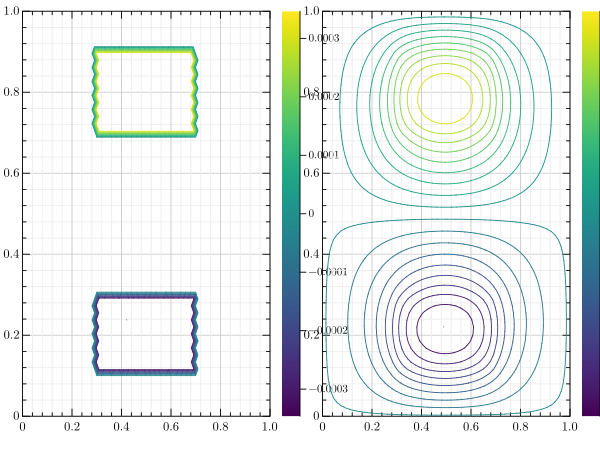

In [6]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
#sourcefunction(x,y) = x+y
sourcefunction(x,y) = (x>0.3)*(x<0.7)*(y>0.7)*(y<0.9) - (x>0.3)*(x<0.7)*(y>0.1)*(y<0.3) 
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]
  I = Vector{Int64}([node1_id; node2_id; node3_id])

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end

  #....compute local vector contribution floc of the current element
  floc = area_id/3*fvalues[I]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc  
  A[I,I] += Aloc
  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..9/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/11 Plot the source term and the numerical solution
GR.subplot(1,2,1)
p1 = GR.tricont(xnode,ynode,f)
GR.subplot(1,2,2)
p1 = GR.tricont(xnode,ynode,u)

## Section 5:/ Post-Processing for the Flux

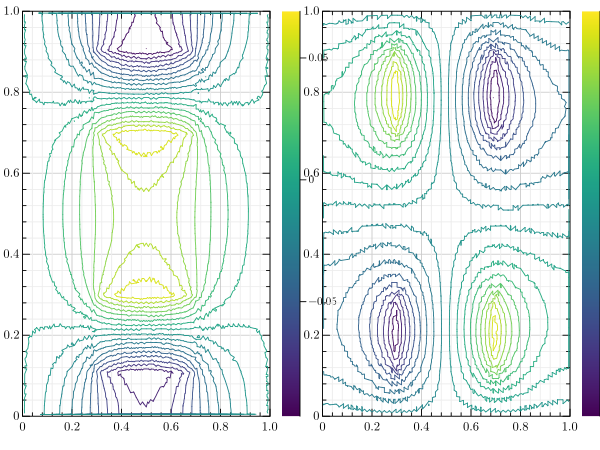

In [10]:
xmid = zeros(nelements,1)
ymid = zeros(nelements,1)
Bx = zeros(nelements,1)
By = zeros(nelements,1)
normB2 = zeros(nelements,1)

for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]
  I = Vector{Int64}([node1_id; node2_id; node3_id])

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....compute local vector contribution floc of the current element
  floc = area_id/3*fvalues[I]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  uloc = u[I]
  
  xmid[element_id] = (xnode1+xnode2+xnode3)/3
  ymid[element_id] = (ynode1+ynode2+ynode3)/3
  Bx[element_id] = uloc[1]*Emat[2,1]+uloc[2]*Emat[2,2]+uloc[3]*Emat[2,3]
  By[element_id] = uloc[1]*Emat[1,1]+uloc[2]*Emat[1,2]+uloc[3]*Emat[1,3]
  normB2[element_id] = Bx[element_id]^2 + By[element_id]^2 

end

GR.subplot(1,2,1)
p1 = GR.tricont(xmid,ymid,Bx)
GR.subplot(1,2,2)
p1 = GR.tricont(xmid,ymid,By)

## Section 6:/ Solving the Scalar Diffusion Equation in Time Domain 

In [23]:
using DifferentialEquations

### Defining the Problem 

In [ ]:
#..define the right-hand side of the ordinary differential equation of the equation of motion 
function scalarDiffusionEquation!(du,u,p,t)
    du .= M \ (sin(2*π*50*t)*f - A*u)
end

#..set initial position and velocity
u0 = fill(1.,nnodes)
                                    
#..set time begin and end forward
t0 = 0.0
tf = 2.0
tspan = (t0,tf)

#..define ODE problem to be solved  
prob_scalarDiffusion = ODEProblem(scalarDiffusionEquation!, u0, tspan)

#..solve ODE problem 
sol = DifferentialEquations.solve(prob_scalarDiffusion);

### Plotting the computed solution 

In [ ]:
dt = 2
tvec = Vector(t0:dt:tf)

Plots.plot(sol)
for i in 2:nnodes-1
    Plots.plot!(sol,vars=i)
end
p1 = Plots.plot!(sol)
title!("Displacement")

#..plot solution of velocity and position as function of time  
Plots.plot(p1)

In [ ]:
anim = @animate for i in t0:tf
    Plots.surface(xnode,ynode,sol(i/10),st=:surface)
    zlims!(-.2, 1.5)
end
gif(anim, "my-animation.gif", fps = 1)

## Section 7:/ Solving a Modified Scalar Diffusion Equation in Time Domain 

In [ ]:
# set damping matrix
C = .005*M 

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function scalarWaveEquation!(ddu,du,u,p,t)
    ddu .= M \ (f - A*u - C*du)
end

#..set initial position and velocity
u0 = fill(0.,nnodes)

v0 = zeros(nnodes)
# v0[4] = 1
                                    
#..set time begin and end forward
t0 = 0.0
tf = 20.0
tspan = (t0,tf)           

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(scalarWaveEquation!,v0,u0,tspan)

#..solve ODE problem 
sol = DifferentialEquations.solve(prob);

### Post-plotting the Solution using time-traces  

In [ ]:
dt = 1
tvec = Vector(t0:dt:tf)

#..velocity and position have vars=(1:N) and vars=(N+1,2N), respectively. 
Plots.plot(sol,vars=1)
for i in 2:nnodes-1
    Plots.plot!(sol,vars=i)
end
p1 = Plots.plot!(sol,vars=nnodes)
title!("Velocity")

plot(sol,vars=nnodes+1)
for i in nnodes+2:2*nnodes-1
    Plots.plot!(sol,vars=i)
end
p2 = Plots.plot!(sol,vars=2*nnodes)
title!("Displacement")

#..plot solution of velocity and position as function of time  
Plots.plot(p1,p2,layout=(2,1))

### Post-plotting using animation 

In [ ]:
anim = @animate for i in t0:tf
    Plots.surface(xnode,ynode,sol(i/10)[nnodes+1:2*nnodes],st=:surface)
    zlims!(-.2, .4)
end
gif(anim, "my-animation.gif", fps = 15)

## Section 8:/ Further Improvements/Extensions to this Notebook 
1. avoid matrix $A$ to be dense. Instead, declare $A$ to be sparse (without pre-allocating memory for $A$). Traverse over elements, assemble I, J, Avals lists. After traversal, use sparse to construct the $A$ matrix (see 1D FEM code). Implement traversal using both for loop and map; 
2. put assembly inside function. Test function for type stability. Profile assemby of matrix and vector for various problem sizes. Check whether making Aloc to be a static matrix has any advantages. Check whether updating lists for I, J and Avals in place has any advanges;  
3. idem for solve. Replace backslash by iterative solution method (AMG as preconditioner for CG) and profile again;  
4. create seperate function to generate Aloc, Mloc and floc allowing to introduce quadrature on the element; 
5. create assembly on quadrilateral elements; 
6. create assembly for second order triangular (quadrilateral) elements; 
7. create assembly for non-homogeneous Neumann boundary conditions; 
8. create assembly for three-dimensional geometries; 